# Import libraries

In [51]:
import pandas as pd
import numpy as np
import os
import config
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from matplotlib.patches import Patch

# Set constants

In [40]:
# set figure details
figsize = (10, 10)
dpi = 200

# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "performance_per_phenotype_per_study.svg"

# Load data

In [22]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])
phenotype = pd.read_csv(os.path.join(config.CLEAN_DIR, "phenotype.csv"), index_col=[0, 1])
GMHI2_scores_cv = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI2_scores_cv.csv"), index_col=[0, 1])
display(X.head())
display(y.head())
display(GMHI2_scores_cv.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-23  SAMEA3879547        0.019774                     0.019774   
         SAMEA3879551        0.000000                     0.000000   
         SAMEA3879543        0.003253                     0.003253   
         SAMEA3879565        0.008863                     0.008863   
         SAMEA3879546        0.000048                     0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-23  SAMEA3879547                                            0.019774   
         SAMEA3879551                                            0.000000   
         SAMEA3879543                                            0.003253   
         SAMEA3879565                                            0.008863   
         SAMEA3879546                                            0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-23  SAMEA3879547                                               0.019774                      
         SAMEA3879551                                               0.000000                      
         SAMEA3879543                                               0.003253                      
         SAMEA3879565                                               0.008863                      
         SAMEA3879546                                               0.000048                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-23  SAMEA3879547                                               0.019774                                             
         SAMEA3879551                                               0.000000                                             
         SAMEA3879543                                               0.003253                                             
         SAMEA3879565                                               0.008863                                             
         SAMEA3879546                                               0.000048                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-23  SAMEA3879547                                               0.019774                                                                   
         SAMEA3879551                                               0.000000                                                                   
         SAMEA3879543                                               0.003253                                                                   
         SAMEA3879565                                               0.008863                                                                   
         SAMEA3879546                                               0.000048                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-23  SAMEA3879547                                               0.019774              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-23  SAMEA3879547                              True
         SAMEA3879551                              True
         SAMEA3879543                              True
         SAMEA3879565                              True
         SAMEA3879546                              True

GMHI2_cv
Study_ID Sample Accession          
GMHI-23  SAMEA3879547      1.884788
         SAMEA3879551     -0.062656
         SAMEA3879543     -0.890399
         SAMEA3879565      0.468921
         SAMEA3879546      1.171292

In [7]:
studies = np.unique(X.index.get_level_values(0))
studies

array(['GMHI-10', 'GMHI-11', 'GMHI-13', 'GMHI-14', 'GMHI-15', 'GMHI-17',
       'GMHI-2', 'GMHI-21', 'GMHI-23', 'GMHI-24', 'GMHI-26', 'GMHI-27',
       'GMHI-28', 'GMHI-3', 'GMHI-31', 'GMHI-32', 'GMHI-33', 'GMHI-4',
       'GMHI-5', 'GMHI-9', 'GMHI-V-35', 'GMHI-V-36', 'GMHI-V-38',
       'GMHI-V-40', 'GMHI-V-41', 'P103', 'P11', 'P110', 'P113', 'P121',
       'P13', 'P132', 'P135', 'P140', 'P15', 'P17', 'P2', 'P21', 'P24',
       'P32', 'P34', 'P39', 'P48', 'P53', 'P56', 'P57', 'P69', 'P74',
       'P76', 'P77', 'P8', 'P80', 'P81', 'P87', 'P88', 'P89', 'P9', 'P94',
       'P95', 'P96', 'P98'], dtype=object)

In [8]:
info = pd.DataFrame((GMHI2_scores_cv > 0).values, index=GMHI2_scores_cv.index, columns=["predicted"])
info["phenotype"] = phenotype
info["y"] = y


# remove samples with low GMHI2 score magnitudes
cutoff = 0.1
info = info[(abs(GMHI2_scores_cv) > cutoff).values]
info

predicted           phenotype      y
Study_ID Sample Accession                                      
GMHI-23  SAMEA3879547           True             Healthy   True
         SAMEA3879543          False             Healthy   True
         SAMEA3879565           True             Healthy   True
         SAMEA3879546           True             Healthy   True
         SAMEA3879522           True             Healthy   True
...                              ...                 ...    ...
P140     SAMN07509562          False  Ulcerative colitis  False
         SAMN07509555          False  Ulcerative colitis  False
         SAMN07509557           True  Ulcerative colitis  False
         SAMN07509546          False  Ulcerative colitis  False
         SAMN07509552          False  Ulcerative colitis  False

[8580 rows x 3 columns]

In [9]:
dicts = []
for study in studies:
    study_df = info.loc[study] 
    study_phenotypes = np.unique(study_df["phenotype"])
    
    # only evaluate case control studies
    if study_phenotypes.shape[0] != 2 or "Healthy" not in study_phenotypes:
        continue
        
    case_phenotype = study_phenotypes[0] if study_phenotypes[0] != "Healthy" else study_phenotypes[1]
        
    precision_control = precision_score(study_df["y"], study_df["predicted"])    
    recall_control = recall_score(study_df["y"], study_df["predicted"])    
        
    precision_case = precision_score(~study_df["y"], ~study_df["predicted"])    
    recall_case = recall_score(~study_df["y"], ~study_df["predicted"])    
    
    dicts.append({
        "study_and_phenotype" : f"{study} Healthy",  
        "precision" : precision_control,
        "recall" : recall_control
    })
    dicts.append({
        "study_and_phenotype" : f"{study} {case_phenotype}",  
        "precision" : precision_case,
        "recall" : recall_case,
    })


In [10]:
df = pd.DataFrame(dicts)
df = df.set_index("study_and_phenotype")
df

,precision,recall
study_and_phenotype,,
GMHI-11 Healthy,0.319149,0.714286
GMHI-11 Colorectal adenoma,0.903226,0.636364
GMHI-17 Healthy,0.421053,0.413793
GMHI-17 Rheumatoid arthritis,0.653061,0.659794
GMHI-2 Healthy,0.730769,0.184466
GMHI-2 Atherosclerotic cardiovascular disease,0.708333,0.966825
GMHI-21 Healthy,0.255319,0.363636
GMHI-21 Hypertension,0.730769,0.619565
GMHI-23 Healthy,0.500000,0.758621


In [45]:
colors = [healthy_color, nonhealthy_color] * (df.shape[0] // 2)

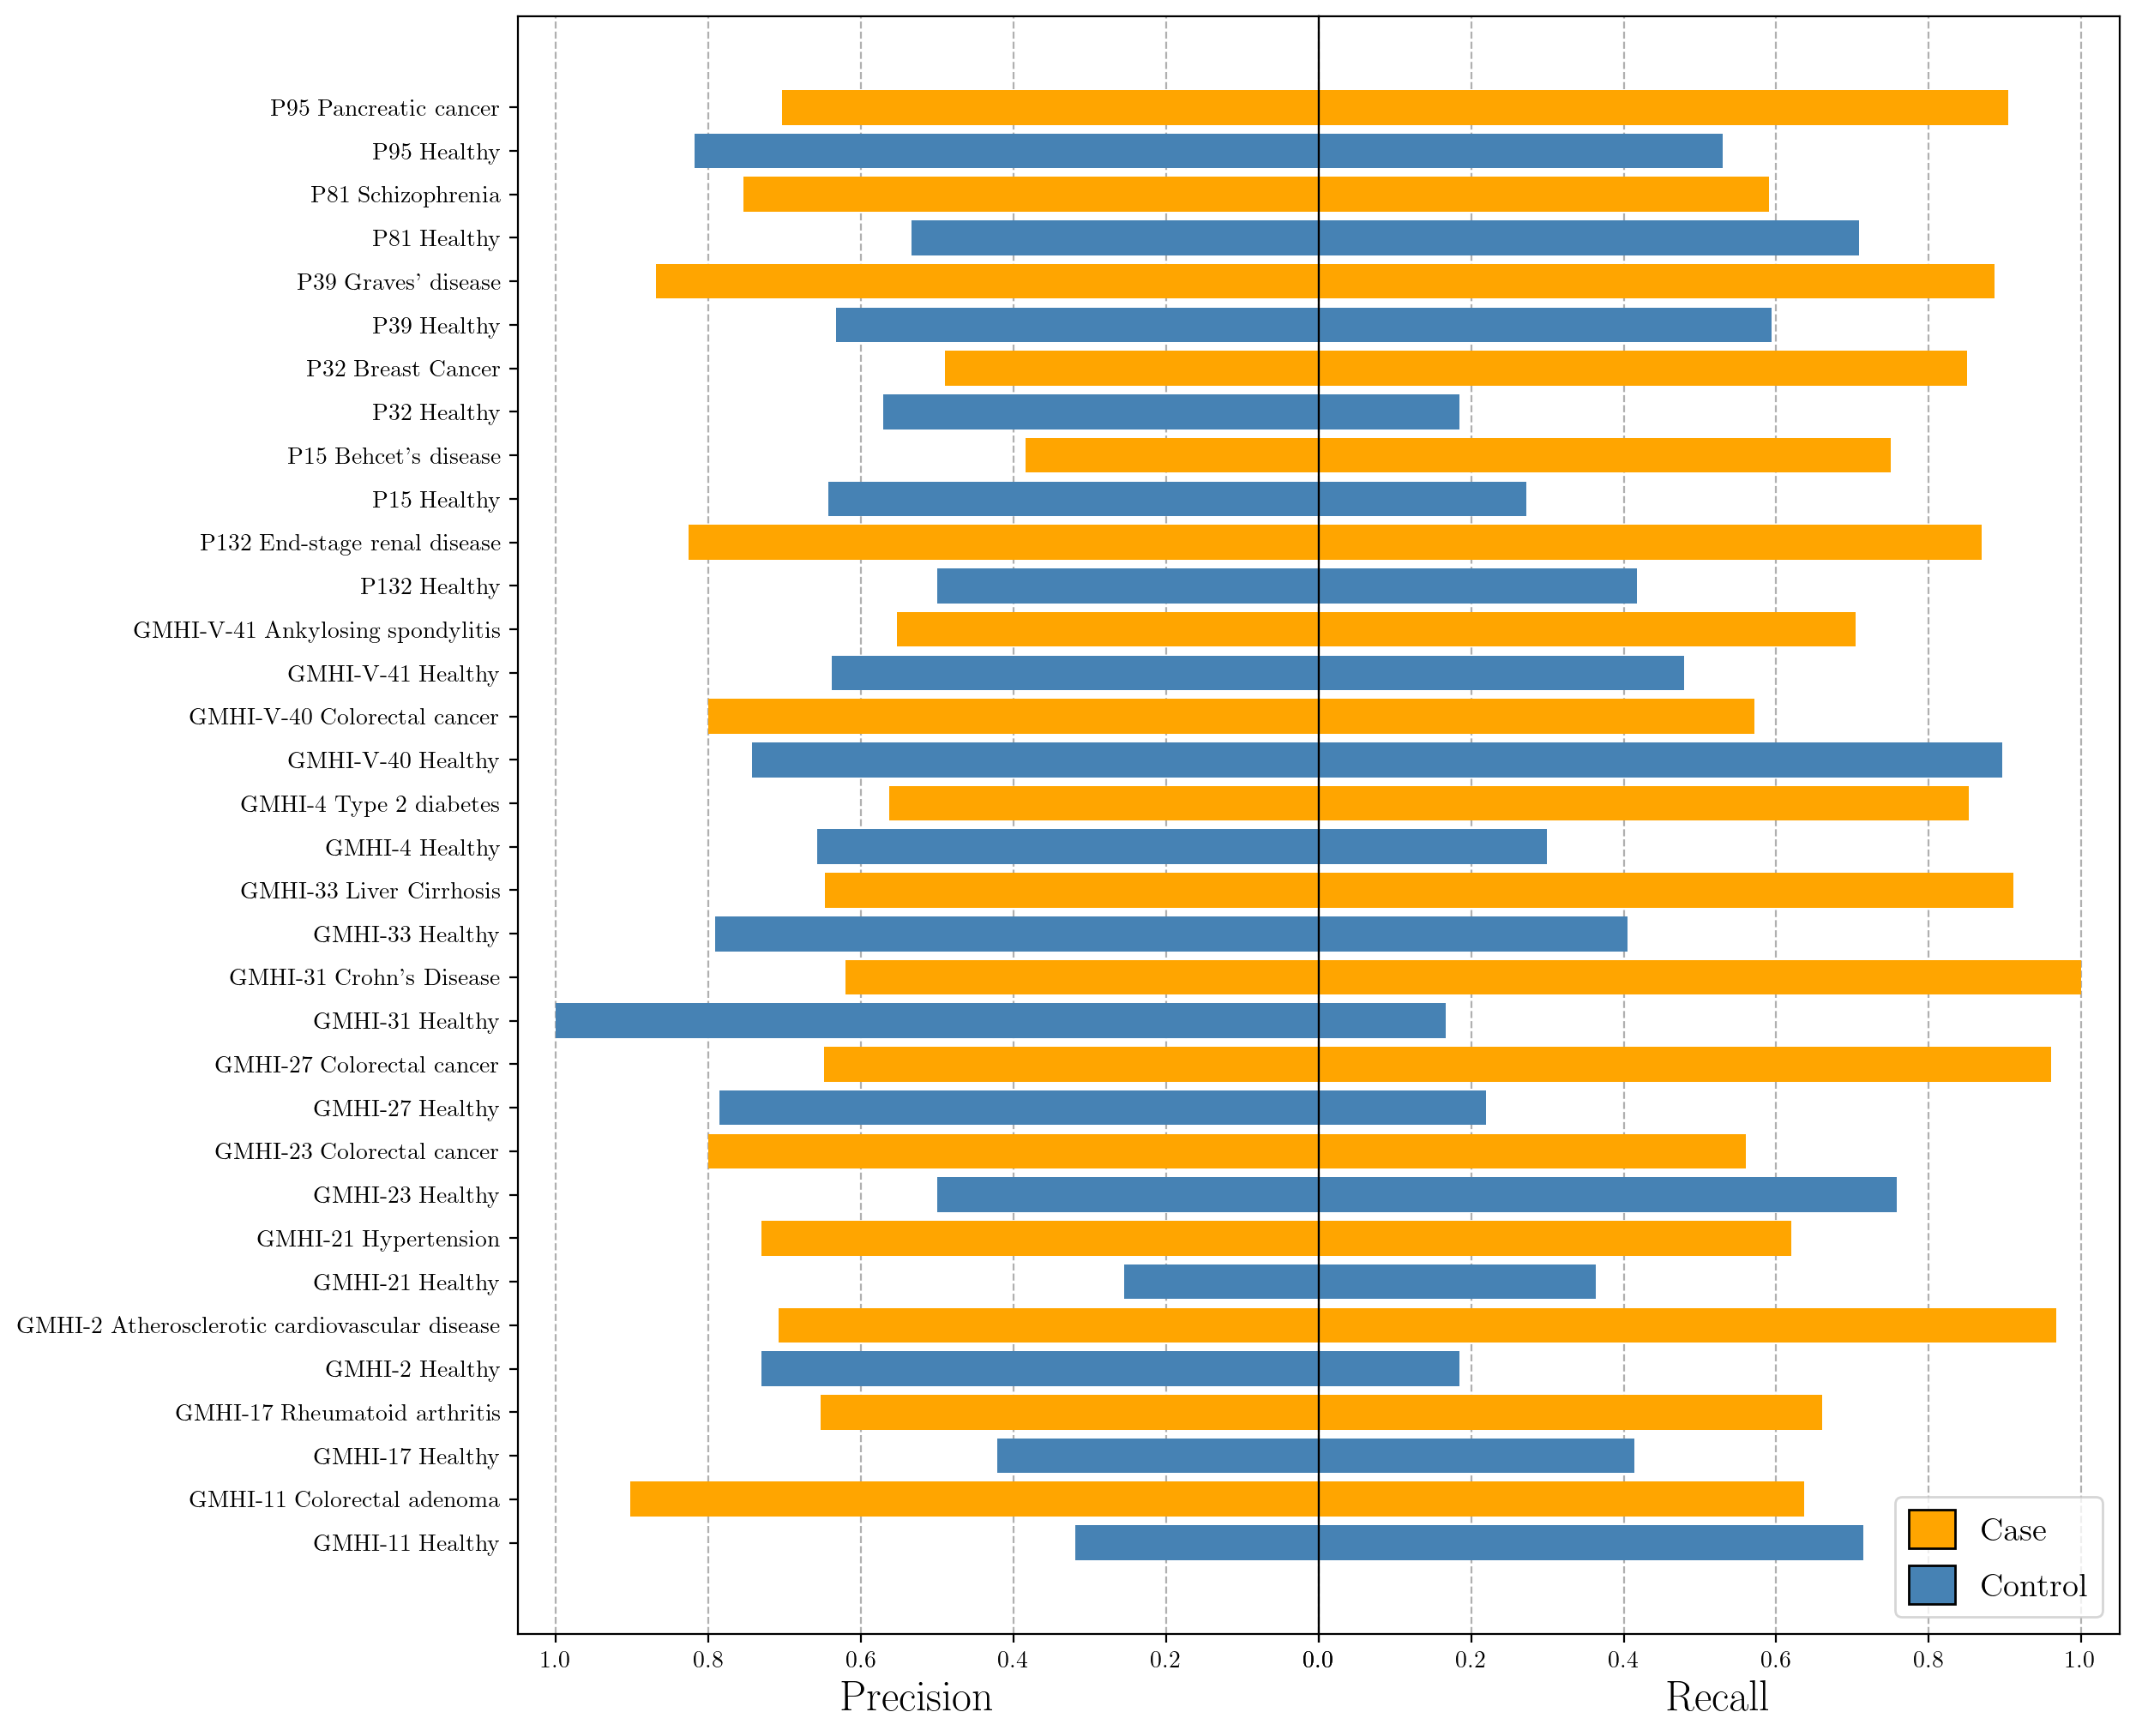

In [57]:
fig, axes = plt.subplots(figsize=figsize, ncols=2, sharey=True, dpi=dpi)

fig.tight_layout()

axes[0].barh(df.index, df["precision"], align='center', color=colors)
axes[0].set_xlabel("Precision", fontsize=18)
axes[0].invert_xaxis() 

axes[1].barh(df.index, df["recall"], align='center', color=colors)
axes[1].set_xlabel("Recall", fontsize=18)
axes[1].tick_params(left=False)

for ax in axes:
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="x")
    
handles = [
    Patch(facecolor=nonhealthy_color, edgecolor="k", label="Case", alpha=1),
    Patch(facecolor=healthy_color, edgecolor="k", label="Control", alpha=1),
]

plt.legend(handles=handles, prop={'size': 14}, loc=0, handlelength=1.4, handleheight=1.4)

plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(config.FIGURE_DIR, filename), bbox_inches='tight')

In [58]:
df.shape

(34, 2)